In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

C:\Users\vkhanna\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


In [2]:
print(train_data.shape)

(404, 13)


In [4]:
print(train_targets[:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [7]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [8]:
#use k-fold cross validation when dataset is small
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [12]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [13]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [15]:
print(average_mae_history[:10])

[4.7962518210458285, 3.3882291576649886, 3.0612831493415453, 2.7477003737251358, 2.799803359673755, 2.703152604622416, 2.6401543829700733, 2.6329407845393265, 2.5640108408314166, 2.5963711951038624]


In [16]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [17]:
print(test_mse_score)

18.148226569680606


In [19]:
#median price of house = 
print(test_mae_score*100)

268.46127603568283


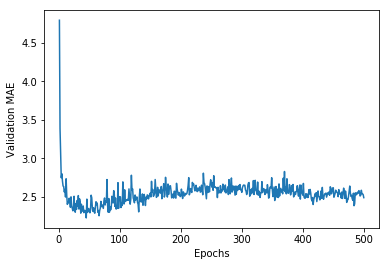

<Figure size 2160x2160 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
fig = plt.figure(figsize=(30,30))
plt.show(fig)

In [35]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

In [37]:
smooth_mae_history[:10]

[2.4971884949372547,
 2.520927953484035,
 2.520951399685133,
 2.5090376505544874,
 2.501181516521992,
 2.493371550938186,
 2.4922391888065833,
 2.487168796557837,
 2.4748354108401216,
 2.477297531919381]

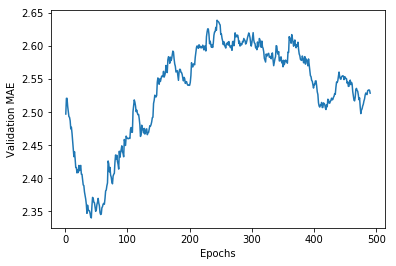

<Figure size 3000x3000 with 0 Axes>

In [43]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
fig = plt.figure(figsize=(10,10))
fig.set_dpi(300)
plt.show()